First try for creating likelihood plots. Some code snipplets are copied from https://github.com/ElisabethRoesch/Bifurcations 

###### [1] Roesch, E., & Stumpf, M. P. H. (2019). Parameter inference in dynamical systems with co-dimension 1 bifurcations. *Royal Society Open Science, 6*(190747). [https://doi.org/10.1098/rsos.190747](https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.190747)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from numpy import genfromtxt
from matplotlib import ticker, cm
from matplotlib.patches import Rectangle
from numpy import inf
#from numpy import NaN

In [2]:
def get_ll_alps_one(alp_ind): # converts index of alpha to actual alpha value (alp_ind is number of alpha value)
    alp = [0.1, 0.9, 1.1, 1.5]  # actual alpha values we have data for
    real_value = alp[alp_ind-1]
    return real_value

def get_ll_ics_one(ics_ind): # converts index of ic to actual ic value
    ics= [0.4, 0.5, 1.0, 1.3, 2.3] # actual ic values we have data for 
    real_value = ics[ics_ind-1]
    return real_value

def read_ll_file(w0, n0, a, m, M, noise, path_to_file): # read in ll data file in required format
    name = "ll"+"_"+str(w0)+"_"+str(n0)+"_"+str(a)+"_"+str(m)+"_"+str(M)+"_"+str(noise)
    ending=".csv"
    csv = np.genfromtxt (path_to_file+name+ending, skip_header=1, delimiter=",")
    csv[csv == -inf] = -1000
    return csv

In [3]:
# eval the biomass n equilibria in dependece of a,m (see bifurcation plot)

def n(a,m,plus: bool):

    sqrt_term = np.sqrt(a**2 - 4 * m**2)

    if plus:
        return (a + sqrt_term) / (2 * m)
    else:
        return (a - sqrt_term) / (2 * m)

In [4]:
def bif_plot(ax, m):
    a_vals = np.linspace(2*m, 2, 400)
    n_plus = [n(a, m, True) for a in a_vals]
    n_minus = [n(a, m, False) for a in a_vals]

    ax.plot(a_vals, np.real(n_plus), color='blue',linewidth=2)
    ax.plot(a_vals, np.real(n_minus), color='blue', linestyle="--",linewidth=2)
    ax.plot(2*m, 1, marker='o', color='blue', markersize=6)
    ax.set_ylim(0, 4)
    ax.axhline(y=0, color='blue', linewidth=4)
    ax.set_xlabel('Water Input a')
    ax.set_ylabel('Biomass n')
    ax.grid(True)
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)

In [19]:
# makes single ll plot for index combination ind

def make_ll_plot(fig,ax,csv,ind):

    a_plot_nr = get_ll_alps_one(ind[0])
    ic_plot_nr = get_ll_ics_one(ind[1])
    
    # points at which ll data is evaluated
    a_x_ticks = np.arange(0.0, 2.1, 0.1)
    inits_y_ticks = np.arange(0.0, 4.1, 0.1)

    # all values below -1000 are mapped to -1000
    levels = np.linspace(-1000, 0, 150)

    # mark true prm combination
    plt.plot([a_plot_nr],[ic_plot_nr],marker="x",label="Truth",color="white",markersize=12,markerfacecolor='gold',markeredgewidth=2.0, markeredgecolor="gold", zorder=10)
    
    if (np.isfinite(csv).any()):   
        ax.grid(color='grey', linestyle='-',alpha=0.1, linewidth=1)
        ax.set_facecolor('white')
        countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
        ax.set_yticks(inits_y_ticks[::4])
        ax.set_xticks(a_x_ticks[::4])
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring, fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        cbar.set_ticks([-1000, -500, 0])
        return countouring
    else:      
        print("eieiei")
        csv[csv == -inf] = -1000
        countouring=ax.contourf(a_x_ticks, inits_y_ticks, csv,30,cmap='Reds',alpha=0.9,levels=levels)
        ax.set_yticks(inits_y_ticks[::4])
        ax.set_xticks(a_x_ticks[::4])
        plt.xlabel("α")
        plt.ylabel("IC")
        cbar = fig.colorbar(countouring,fraction=0.09)
        cbar.ax.set_ylabel('Log-Likelihood')
        cbar.set_ticks([-1000, -500, 0])
        return("eieieie")

In [20]:
a_vals = [0.1, 0.9, 1.1, 1.5] 
n0_vals = [0.4, 0.5, 1.0, 1.3, 2.3]

index_combos = [[1,1], [2,4], [3,5], [4,2], [4,3]]

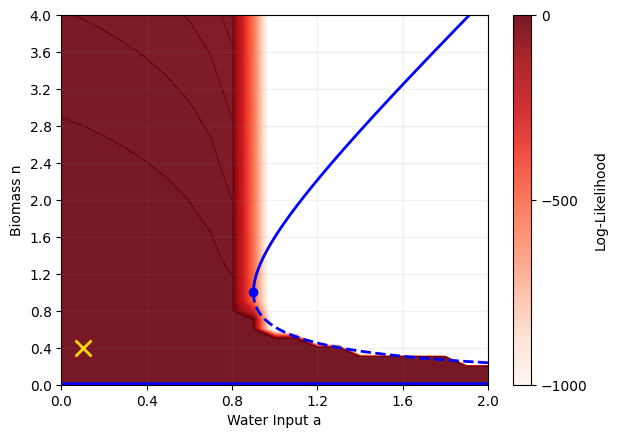

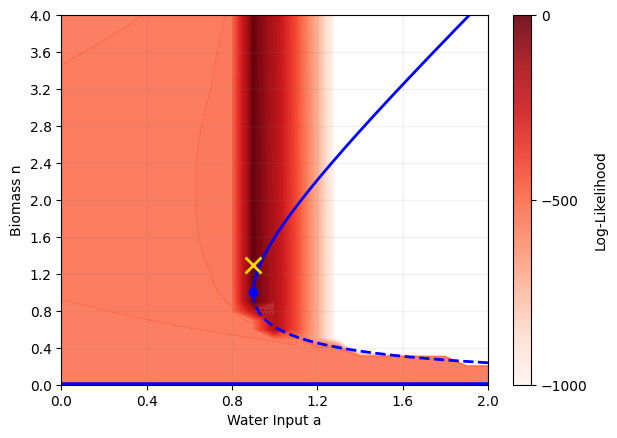

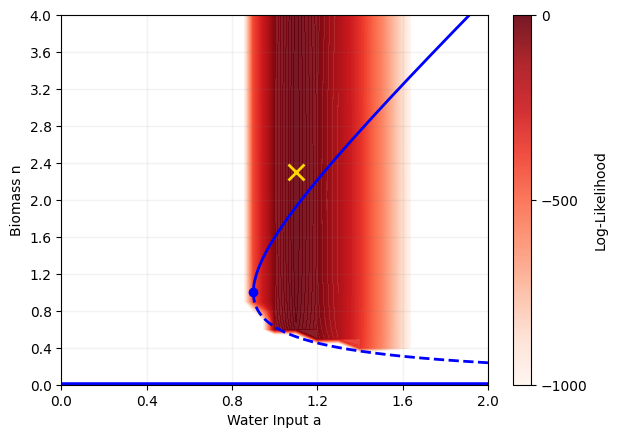

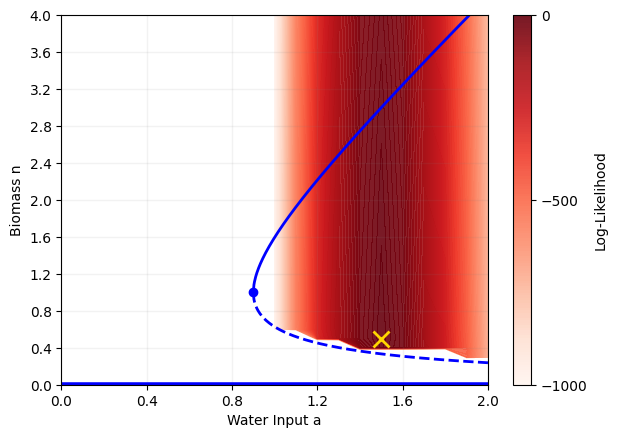

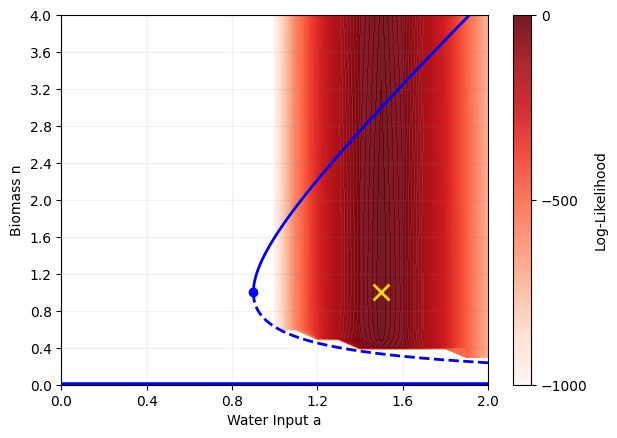

In [22]:
# generate all plots

path_to_file= "c:/Users/lisah/Documents/Repos/ma-code/data/likelihood/m0.45/"

M_vals = [1000]
noise_vals = [0.0]
m = 0.45 # fix for now as given by literature
w0 = 0.9 # Q: which value?

for ind in index_combos:
    for M in M_vals:
        for noise in noise_vals:
            n0 = get_ll_ics_one(ind[1])
            a = get_ll_alps_one(ind[0])
            csv = read_ll_file(w0,n0,a,m,M,noise,path_to_file)
            fig, ax = plt.subplots()
            make_ll_plot(fig, ax, csv, ind)
            bif_plot(ax,m)
            plt.savefig(f"c:/Users/lisah/Documents/Repos/ma-code/plots/likelihood/m0.45/ll_{w0}_{n0}_{a}_{m}_{M}_{noise}.pdf", bbox_inches='tight')


In [8]:
# generate single plot

# path_to_file= "c:/Users/lisah/Documents/Repos/ma-code/data/likelihood/m0.45/"

# #a_vals = [0.1, 0.9, 1.1, 1.5] 
# #n0_vals = [0.4, 0.5, 1.0, 1.3, 2.3]

# prm_ind = index_combos[1]

# m = 0.45
# w0 = 0.9
# M = 1000
# noise = 0.0
# n0 = get_ll_ics_one(prm_ind[1])
# a = get_ll_alps_one(prm_ind[0])
# csv = read_ll_file(w0,n0,a,m,M,noise,path_to_file)

# fig, ax = plt.subplots()
# make_ll_plot(fig, ax, csv, prm_ind)
# bif_plot(ax,m)